## LIBRARIES

In [1]:
import pandas as pd
import requests
import numpy as np

## CSV FILES FOR NFT COLLECTION

In [5]:
Karafuru=pd.read_csv("Karafuru.csv")
CloneX=pd.read_csv("CloneX.csv")
Doodles=pd.read_csv("Doodles.csv")
Azuki=pd.read_csv("Azuki.csv")
Moonbirds=pd.read_csv("Moonbirds.csv")

## CLEAN THE NFT COLLECTION DATA

In [6]:
def clean_dataframe_nfts(df):
    
    df=df.drop_duplicates()
    df.index=np.arange(df.index.shape[0])
    
    try:
        df=df.drop(["Unnamed: 0"], axis=1)
        
    except:
        pass

    try:
        df[["eventHash","fromAddress","toAddress","tokenId"]]=pd.DataFrame(df["topics"].tolist(), index=df.index)
        
        
    except:
        df['topics'] = df.apply(lambda row:  row['topics'].strip('[]').replace('"', '').replace(' ', '').split(',')   , axis=1)
        df[["eventHash","fromAddress","toAddress","tokenId"]]=pd.DataFrame(df["topics"].tolist(), index=df.index)
        
    df["timeStamp"]=df["timeStamp"].apply(int, base=16)

    df["blockNumber"]=df["blockNumber"].apply(int, base=16)
    df["fromAddress"]= "0x" + df.fromAddress.str.slice(26,66)
    df["toAddress"]= "0x" + df.toAddress.str.slice(26,66)
    
    try:
        df.tokenId=df.tokenId.str.replace("'", "")
        
    except:
        pass
    
    
    df=df.drop(columns=["gasPrice", "gasUsed", "logIndex"])
    df=df.drop(columns=["data", "transactionIndex", "topics"])
    
    df= df[df.timeStamp != "timeStamp"]
    df= df[df.blockNumber != "blockNumber"]
    df= df[df.transactionHash != "transactionHash"]

    df.index=np.arange(df.index.shape[0])
    df.tokenId=df.tokenId.apply(int, base=16)
    
    return df

In [7]:
dataframe1=clean_dataframe_nfts(Karafuru) #insert any NFT collection saved previously via CSV file
dataframe1

,address,blockNumber,timeStamp,transactionHash,eventHash,fromAddress,toAddress,tokenId
0,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14138898,1643969774,0x52699ee257c9c8ee627262e667064e7c042c49c59dc4...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0000000000000000000000000000000000000000,0x09a86c0b064171007716bbd6af96676935799a63,1
1,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14139929,1643983165,0x513211055a4fe4368342f28de48dc501a402194877cf...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0000000000000000000000000000000000000000,0x041ac554367a7dd7cbc29c3d84e5cbe34fc69a21,2
2,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14139929,1643983165,0xd9a32fe79ef4ba6c269ab3dd0a3c1974d6db8c5aa9e4...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0000000000000000000000000000000000000000,0x0436d637e0f602f345f7d7ea6c07ffdda7d99796,3
3,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14139929,1643983165,0xb5eb220976749e1368b9405cbef9b3132bc176eb89d6...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0000000000000000000000000000000000000000,0x06b00fc3d9d1cd2f89029f76a106336f07a7f2f8,4
4,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14139929,1643983165,0xa3278122720dfba71dd2f2a9cb8e5a7519e5f2e8c1de...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0000000000000000000000000000000000000000,0x091dc84a0845e4e267517a6e546beab331c22357,5
...,...,...,...,...,...,...,...,...
24588,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14791222,1652772517,0x8f5585e298f4b538bfda45cd5f0b1b5aaaaaa3d4e2d4...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x05061f57810a3ab92902b52004ade7ae5810a125,0x028fce30b2063935c9b3208ca80d9608753bd87a,5383
24589,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14791222,1652772517,0x8f5585e298f4b538bfda45cd5f0b1b5aaaaaa3d4e2d4...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0bcdcd01cbe610f8d41e8cfe8fecb5f2ff484cf3,0x028fce30b2063935c9b3208ca80d9608753bd87a,5257
24590,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14791237,1652772746,0xdc0aaff465952d33b21508db83342d704f8dcf80de19...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x08af3038a4f29a81b605d521101cfd34d3e3447c,0x0dea790aa92e55c629bcddd66f8287d12de96809,4898
24591,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14791254,1652772971,0xecc2afe5a2258e60937bceb320d146440ff15786201d...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0bcdcd01cbe610f8d41e8cfe8fecb5f2ff484cf3,0x019fe05a52c04a9748393e15381cfe1280966c9b,3469


In [13]:
dataframe1.tokenId.nunique() #check if we got all the unique NFTs

5555

## CSV FILES FOR OPENSEA DATA
### for eth price of nft collections

With the previous NFT data, we collected all the transactions of the unique NFTs. But the ETH price is stored in the OpenSea contract, which is why we have to collect all the OpenSea data to get the ETH price of each unique NFT sold.

In [9]:
df=pd.read_csv("Bored_Apes_V1_Oct.csv") #april to october '21
df1=pd.read_csv("Bored_Apes_V1_3.csv") #october to january
df2=pd.read_csv("Bored_Apes_Month_3.csv") #january to february
df3=pd.read_csv("Opensea_v2_NFT.csv") #february to march
df4=pd.read_csv("Opensea_v2_NFT_2.csv") #march to april
df5=pd.read_csv("Opensea_v2_NFT_3.csv") #april to may


In [10]:
opensea_list=[df, df1, df2, df3, df4, df5] #combining all the dataframes
opensea_df=pd.concat(opensea_list) #merging all dfs into one df

## CLEAN THE OPENSEA DATA

In [11]:
def clean_dataframe_opensea(df):

    df=df.drop_duplicates()
    df.index=np.arange(df.index.shape[0])
    
    try:
        df=df.drop(["Unnamed: 0"], axis=1)
        
    except:
        pass

        
    #df["timeStamp"]=df["timeStamp"].apply(int, base=16)
    #df["blockNumber"]=df["blockNumber"].apply(int, base=16)
    #df["fromAddress"]= "0x" + df.fromAddress.str.slice(26,66)
    #df["toAddress"]= "0x" + df.toAddress.str.slice(26,66)
    df= df[df.data != "data"]

    df["ETHprice"]= "0x" + df.data.str[-64:]
    df["ETHprice"]=df["ETHprice"].apply(int, base=16)
    df["ETHprice"]= df.ETHprice/1e+18
    df.ETHprice=df.ETHprice.fillna(0)
    #df=df.drop(columns=["gasPrice", "gasUsed", "logIndex"])
    #df=df.drop(columns=["data", "transactionIndex", "topics"])
    
    df=df[["transactionHash", "ETHprice"]]

    
    return df

In [12]:
dataframe2=clean_dataframe_opensea(opensea_df) #save the clean data as new dataframe


In [373]:
dataframe2.ETHprice.value_counts() #counting the unique values of the ETHprice column

0.100000     484128
0.050000     407854
0.010000     351920
0.200000     302126
0.150000     292054
              ...  
10.024210         1
2.059100          1
2.949943          1
0.119210          1
0.144900          1
Name: ETHprice, Length: 142137, dtype: int64

## MERGING THE NFT DATA WITH THE OPENSEA DATA

In [14]:
prefinal_dataset=pd.merge(dataframe1,dataframe2,on='transactionHash',how='left')

In [15]:
prefinal_dataset.tokenId.nunique()

5555

In [16]:
min(prefinal_dataset.ETHprice) #not all of the transactions have an ETH price

nan

In [18]:
max(pd.to_datetime(prefinal_dataset["timeStamp"], unit="s"))

Timestamp('2022-05-17 07:37:03')

In [19]:
max(pd.to_datetime(dataframe1["timeStamp"], unit="s"))

Timestamp('2022-05-17 07:37:03')

In [24]:
opensea_df= opensea_df[opensea_df.timeStamp != "timeStamp"]
opensea_df.timeStamp=opensea_df.timeStamp.apply(int, base=16)
max(pd.to_datetime(opensea_df["timeStamp"], unit="s"))

Timestamp('2022-05-06 09:53:21')

## POLONIEX API: GET THE USD PRICE OF ETH

In [18]:
command = "returnChartData"
currencyPair = "USDT_ETH"
start = str(min(prefinal_dataset.timeStamp)) #use the earlierst date as a start in decimal value
end = str(max(prefinal_dataset.timeStamp)) #use the latest date as a start in decimal value
period = "1800" #in seconds, translates to 30 mins
url="https://poloniex.com/public?command="+command+"&currencyPair="+currencyPair+"&start="+start+"&end="+end+"&period="+period

response = requests.get(url)
address_content= response.json() #get the data in json format
address_content
#test API url
#url= "https://poloniex.com/public?command=returnChartData&currencyPair=USDT_ETH&start=1626689160&end=1626700788&period=1800"

[{'date': 1643969774,
  'high': 2830.28711807,
  'low': 2830.28711807,
  'open': 2830.28711807,
  'close': 2830.28711807,
  'volume': 0,
  'quoteVolume': 0,
  'weightedAverage': 2830.28711807},
 {'date': 1643970600,
  'high': 2841.16331765,
  'low': 2824.5935967,
  'open': 2830,
  'close': 2832.70341546,
  'volume': 36151.42306537,
  'quoteVolume': 12.76004748,
  'weightedAverage': 2833.17308356},
 {'date': 1643972400,
  'high': 2840.40505742,
  'low': 2825,
  'open': 2832.490968,
  'close': 2833.21020402,
  'volume': 37697.06356739,
  'quoteVolume': 13.3070547,
  'weightedAverage': 2832.86305025},
 {'date': 1643974200,
  'high': 2841.47798726,
  'low': 2825.69508627,
  'open': 2832.76719894,
  'close': 2828.44087988,
  'volume': 123574.2538319,
  'quoteVolume': 43.60304355,
  'weightedAverage': 2834.07404096},
 {'date': 1643976000,
  'high': 2843.58057601,
  'low': 2827.56044224,
  'open': 2827.56044224,
  'close': 2843.58057601,
  'volume': 59744.48990349,
  'quoteVolume': 21.0578126

In [19]:
historical_price=pd.DataFrame.from_dict(address_content) #save the json data as dataframe
historical_price=historical_price[["date", "weightedAverage"]] #we are only interested in date and price
historical_price

,date,weightedAverage
0,1643969774,2830.287118
1,1643970600,2833.173084
2,1643972400,2832.863050
3,1643974200,2834.074041
4,1643976000,2837.165040
...,...,...
4887,1652765400,2078.240734
4888,1652767200,2074.582886
4889,1652769000,2089.354397
4890,1652770800,2077.624477


## INTERPOLATION
We need to get matching data: as the data from etherscan is in seconds but the poloniex data in 30mins intervals, we need to interpolate the data to get data for every second.

In [20]:
def interpolation(historical_price):
    historical_price.rename(columns = {'weightedAverage':'ETHtoUSDrate'}, inplace = True)
    historical_price["date"] =pd.to_datetime(historical_price["date"], unit="s")
    historical_price=historical_price.set_index('date').resample("S").asfreq()
    historical_price=historical_price.interpolate(method='spline', order=2)
    

    
    return historical_price

In [21]:
historical_price=interpolation(historical_price)

In [22]:
historical_price

,ETHtoUSDrate
date,
2022-02-04 10:16:14,2830.287118
2022-02-04 10:16:15,2830.414430
2022-02-04 10:16:16,2830.418362
2022-02-04 10:16:17,2830.422291
2022-02-04 10:16:18,2830.426218
...,...
2022-05-17 07:29:56,2073.088829
2022-05-17 07:29:57,2073.144711
2022-05-17 07:29:58,2073.200659


## VISUALIZATION OF THE ETH/USD PRICE DURING THE PERIOD

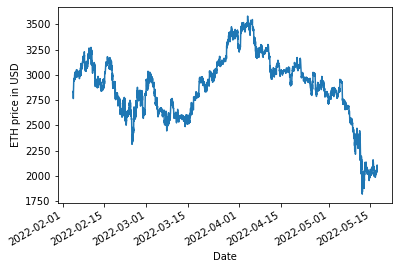

In [23]:
x=historical_price.index
y=historical_price.ETHtoUSDrate
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x,y)
ax.xaxis_date()     # interpret the x-axis values as dates
fig.autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("ETH price in USD")# make space for and rotate the x-axis tick labels
plt.show()

In [24]:
historical_price=historical_price.reset_index().rename(columns={'date':'timeStamp'}) 
prefinal_dataset["timeStamp"] =pd.to_datetime(prefinal_dataset["timeStamp"], unit="s") #decoding the timeStamp in datetime
prefinal_dataset.timeStamp=prefinal_dataset.timeStamp.astype('datetime64[ns]') #transforming the timeStamp in datetime64


## COMBINING THE USD PRICE OF ETH WITH THE NFT DATA

In [25]:
final_dataset=pd.merge(historical_price,prefinal_dataset,on='timeStamp',how='right')

In [26]:
final_dataset

,timeStamp,ETHtoUSDrate,address,blockNumber,transactionHash,eventHash,fromAddress,toAddress,tokenId,ETHprice
0,2022-02-04 10:16:14,2830.287118,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14138898,0x52699ee257c9c8ee627262e667064e7c042c49c59dc4...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0000000000000000000000000000000000000000,0x09a86c0b064171007716bbd6af96676935799a63,1,NaN
1,2022-02-04 13:59:25,2779.430311,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14139929,0x513211055a4fe4368342f28de48dc501a402194877cf...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0000000000000000000000000000000000000000,0x041ac554367a7dd7cbc29c3d84e5cbe34fc69a21,2,NaN
2,2022-02-04 13:59:25,2779.430311,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14139929,0xd9a32fe79ef4ba6c269ab3dd0a3c1974d6db8c5aa9e4...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0000000000000000000000000000000000000000,0x0436d637e0f602f345f7d7ea6c07ffdda7d99796,3,NaN
3,2022-02-04 13:59:25,2779.430311,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14139929,0xb5eb220976749e1368b9405cbef9b3132bc176eb89d6...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0000000000000000000000000000000000000000,0x06b00fc3d9d1cd2f89029f76a106336f07a7f2f8,4,NaN
4,2022-02-04 13:59:25,2779.430311,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14139929,0xa3278122720dfba71dd2f2a9cb8e5a7519e5f2e8c1de...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0000000000000000000000000000000000000000,0x091dc84a0845e4e267517a6e546beab331c22357,5,NaN
...,...,...,...,...,...,...,...,...,...,...
26866,2022-05-17 07:28:37,2068.879645,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14791222,0x8f5585e298f4b538bfda45cd5f0b1b5aaaaaa3d4e2d4...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x05061f57810a3ab92902b52004ade7ae5810a125,0x028fce30b2063935c9b3208ca80d9608753bd87a,5383,NaN
26867,2022-05-17 07:28:37,2068.879645,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14791222,0x8f5585e298f4b538bfda45cd5f0b1b5aaaaaa3d4e2d4...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0bcdcd01cbe610f8d41e8cfe8fecb5f2ff484cf3,0x028fce30b2063935c9b3208ca80d9608753bd87a,5257,NaN
26868,2022-05-17 07:32:26,NaN,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14791237,0xdc0aaff465952d33b21508db83342d704f8dcf80de19...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x08af3038a4f29a81b605d521101cfd34d3e3447c,0x0dea790aa92e55c629bcddd66f8287d12de96809,4898,NaN
26869,2022-05-17 07:36:11,NaN,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14791254,0xecc2afe5a2258e60937bceb320d146440ff15786201d...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0bcdcd01cbe610f8d41e8cfe8fecb5f2ff484cf3,0x019fe05a52c04a9748393e15381cfe1280966c9b,3469,NaN


In [27]:
pd.isnull(final_dataset["ETHprice"]).value_counts() #a big portion of the data contains no ETH price: we exclude that data

True     13779
False    13092
Name: ETHprice, dtype: int64

In [28]:
def clean_final_data(final_dataset): #drop duplicates, exclude data if ETH price is missing and calculate the USDprice of the NFTs
    final_dataset=final_dataset.drop_duplicates() 
    final_dataset=final_dataset.fillna(0)
    final_dataset["USDprice"]=final_dataset.ETHtoUSDrate*final_dataset.ETHprice
    final_dataset= final_dataset[final_dataset.ETHprice != 0]
    
    
    return final_dataset

In [29]:
final_dataset=clean_final_data(final_dataset)
final_dataset

,timeStamp,ETHtoUSDrate,address,blockNumber,transactionHash,eventHash,fromAddress,toAddress,tokenId,ETHprice,USDprice
556,2022-02-04 14:01:20,2783.720313,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14139940,0x58e6c2bb9892d9fe03f185d8eeda7de59a312b5a81f8...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0525f901de6f9c09b0bbd037d6134e9f00917085,0x04ae4b42bb0209b62f8aee5babd92c84166e6bb1,37,1.000,2783.720313
663,2022-02-04 14:01:23,2783.829851,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14139941,0x8da3f9079cfb598fb00dd2e7939e4d8352cbbba06d23...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0e19e26becff917f057ebb35217fdf4ab3252dff,0x00682b693583885fb67169e893881e3f71339c91,151,2.900,8073.106567
759,2022-02-04 14:01:46,2784.663803,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14139943,0xd18fcaebfd7e0b75d4e90025f9ebad1eb9db56e8c1ab...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x046e9c4ccdf6c12725a9f2fd5860ddf1b09fb6ef,0x0fb934067c8b9cae42f3b296fe977409b4f8e143,44,2.220,6181.953643
993,2022-02-04 14:02:22,2785.948403,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14139949,0x16820aa324e39784548524d897b2bad80c17afec3284...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0de3a6e895ba4946445d980841865e2eec553e05,0x05a7ded01ddc1a2522c987b176606d0939e4813d,523,3.000,8357.845209
1033,2022-02-04 14:02:31,2786.265602,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14139950,0x0faf02fb546938938a31b86a743619544abb5b69de83...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0f5a4918a90d55d7754db9f2c6dd8181369ad775,0x0fb2056b830fc5dec5ef6343f38e6c10feceff3a,221,1.990,5544.668549
...,...,...,...,...,...,...,...,...,...,...,...
25904,2022-05-06 05:34:04,2750.745643,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14721715,0x2e78fb04a11081280e38d281b49bc553664cf8761f8d...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x0e94f5002581b2e841f35ee810d6f2b8bbc98621,0x0e86f06b25c0cce66ee327cb55e01b98be2490f8,185,2.390,6574.282086
25905,2022-05-06 05:35:30,2750.798628,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14721722,0x7ed4248ea980a3bbfd849681005f3d2376283c4dec41...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x02a4b5eb94eec572c3e72f27087948ab05e2fa44,0x04e690ac9c02fc5f7dbb8ed3448340182eb13c3c,3539,2.300,6326.836844
25910,2022-05-06 07:30:58,2712.285695,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14722234,0x25170238ebbb7957990fa99a808496b4ffe3d02804af...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x038ac81721419ac782ee8cc8505b4e8fa561f2db,0x0e56c76d5e176c66f86477159ef7bc8f85d03a46,2960,2.380,6455.239953
25911,2022-05-06 07:37:58,2706.024562,0xd2f668a8461d6761115daf8aeb3cdf5f40c532c6,14722261,0x6f961d446b2b8190ad34d64427fc0c0e0387e801801b...,'0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x038ac81721419ac782ee8cc8505b4e8fa561f2db,0x05e6f7603babed10f0ae29666cec2aea445ca752,5526,2.380,6440.338457


In [30]:
final_dataset.ETHprice.value_counts()

4.0000      456
3.0000      356
3.9000      334
3.5000      293
3.3000      196
           ... 
100.0000      1
66.0000       1
3.2437        1
3.2763        1
2.1110        1
Name: ETHprice, Length: 1270, dtype: int64

In [31]:
final_dataset.describe() #some descriptive statistics 

,ETHtoUSDrate,blockNumber,tokenId,ETHprice,USDprice
count,11912.000000,1.191200e+04,11912.000000,11912.000000,11912.000000
mean,3002.760436,1.424850e+07,2820.762173,3.810934,11474.096863
std,200.433688,1.486018e+05,1636.190739,2.406357,7471.892322
min,2313.027591,1.413994e+07,2.000000,0.000500,1.458759
25%,2889.847056,1.415371e+07,1402.250000,3.000000,8986.917213
50%,3027.998887,1.418070e+07,2781.000000,3.600000,10999.668866
75%,3112.329346,1.427210e+07,4262.000000,4.000000,12192.419314
max,3581.243478,1.472286e+07,5555.000000,100.000000,302800.576082


In [32]:
final_dataset.tokenId.nunique() #as data with ETH price of 0 is excluded, some NFTs are excluded and the number of unique token IDs decreases

4535

In [33]:
min(final_dataset.timeStamp)

Timestamp('2022-02-04 14:01:20')

In [34]:
min(final_dataset.ETHprice)

0.0005

In [35]:
max(final_dataset.USDprice)

302800.57608196314

In [36]:
max(final_dataset.ETHprice)

100.0

In [393]:
pd.set_option("max_colwidth", 100)

In [394]:
final_dataset[final_dataset.USDprice==146616438.0226217].transactionHash

193122    0xf827fb3197454e716f2753492dbd5294c6f7eb662130da1b924473fe12f0cc99
Name: transactionHash, dtype: object

In [37]:
#50000000000000000000000
final_dataset[final_dataset.USDprice==146616438.0226217]

,timeStamp,ETHtoUSDrate,address,blockNumber,transactionHash,eventHash,fromAddress,toAddress,tokenId,ETHprice,USDprice


In [404]:
final_dataset.transactionHash.iloc[10]

'0xfd35949b121db90a80f52545ab096c14601cf4a0a5c2d94ebf6c6ae046bc5279'

In [399]:
50000000000000000000000*2932.32876

1.4661643799999997e+26

In [400]:
50000*2932.32876

146616438.0

In [38]:
import plotnine as p9
from plotnine import ggplot, aes, geom_line, geom_point, scale_x_continuous, scale_y_continuous
from plotnine import *
from plotnine.data import *

In [278]:
test= final_dataset[final_dataset.ETHprice < 5000]

In [291]:
final_dataset.tokenId

19552     0x00000000000000000000000000000000000000000000...
19586     0x00000000000000000000000000000000000000000000...
19838     0x00000000000000000000000000000000000000000000...
21504     0x00000000000000000000000000000000000000000000...
21544     0x00000000000000000000000000000000000000000000...
                                ...                        
196114    0x00000000000000000000000000000000000000000000...
196120    0x00000000000000000000000000000000000000000000...
196127    0x00000000000000000000000000000000000000000000...
196131    0x00000000000000000000000000000000000000000000...
196132    0x00000000000000000000000000000000000000000000...
Name: tokenId, Length: 31337, dtype: object

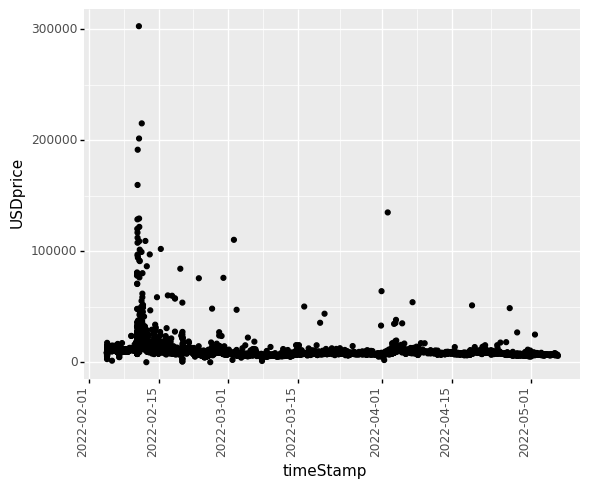

<ggplot: (8774174644474)>

In [39]:
pSalesPrice = ggplot(final_dataset, aes(x = final_dataset.timeStamp, y = final_dataset.USDprice)) + geom_point() +p9.theme(axis_text_x  = element_text(angle = 90, hjust = 1))

pSalesPrice

In [40]:
ggsave(filename = "Karafuru.png",
       plot = pSalesPrice)

/Users/konstantinkaiser/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/konstantinkaiser/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Karafuru.png


In [41]:
import plotly.graph_objects as go

import networkx as nx 

In [42]:
gt_7=final_dataset.groupby("tokenId").nunique().astype(int)

In [43]:
tokenID_gt7=gt_7[gt_7.transactionHash.gt(3)]
tokenID_gt7_list=gt_7[gt_7.transactionHash.gt(3)].index

In [44]:
tokenID_gt7_df=final_dataset[final_dataset.tokenId.isin(tokenID_gt7_list)]

In [45]:
tokenID_gt7_df.timeStamp.round("60min")

556     2022-02-04 14:00:00
663     2022-02-04 14:00:00
993     2022-02-04 14:00:00
1033    2022-02-04 14:00:00
1118    2022-02-04 14:00:00
                ...        
25870   2022-05-05 13:00:00
25873   2022-05-05 15:00:00
25891   2022-05-05 20:00:00
25895   2022-05-05 21:00:00
25903   2022-05-06 05:00:00
Name: timeStamp, Length: 4255, dtype: datetime64[ns]

In [46]:
#alternative: tokenID_gt7_df.toAddress.ravel()
to_address_list=[tokenID_gt7_df.groupby("toAddress").nunique().index]
#alternative: tokenID_gt7_df.fromAddress.ravel()
from_address_list=[tokenID_gt7_df.groupby("fromAddress").nunique().index]

In [47]:
address_list= from_address_list + to_address_list

In [48]:
G = nx.from_pandas_edgelist(tokenID_gt7_df, source="fromAddress", target="toAddress", edge_attr="transactionHash")

In [49]:
from pyvis.network import Network

In [50]:
net= Network(notebook=True)

In [51]:
net.from_nx(G)

In [52]:
net.show("example.html")

In [53]:
net.save_graph("Karafuru.html")